In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

In [2]:
x_train, y_train= load_data()

In [3]:
print(f"number of training examples:{len(y_train)}")

number of training examples:97


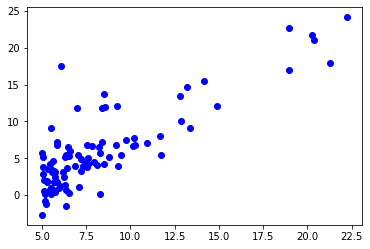

In [4]:
plt.scatter(x_train, y_train, marker='o', c='b')
plt.show()

In [23]:
def compute_cost(x, y, w, b):
    m = len(y)
    y_pred = w * x + b
    #print(y_pred, y)
    total_cost = np.sum((y - y_pred)**2)/(2*m)
    return total_cost

In [24]:
init_w, init_b = (2,1)
cost = compute_cost(x_train, y_train, init_w, init_b)
print(f'cost with these init values: {cost}')

from public_tests import *
compute_cost_test(compute_cost)

cost with these init values: 75.20338497891959
All tests passed!


In [25]:
def mytest():    
    x = np.array([2, 4, 6, 8]).T
    y = np.array([7, 11, 15, 19]).T
    initial_w = 2.0
    initial_b = 1.0
    
    cost = compute_cost(x, y, initial_w, initial_b)
    print('cost = ', cost)
    
mytest()

cost =  2.0


In [26]:
def compute_gradient(x, y, w, b):
    m = len(y)
    diff  = w * x + b - y
    dj_db = np.sum(diff) / m
    dj_dw = np.sum(diff * x) / m
    return dj_dw, dj_db

In [27]:
initial_w = 0
initial_b = 0
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

compute_gradient_test(compute_gradient)

Gradient at initial w, b (zeros): -65.32884974555671 -5.839135051546393
Using X with shape (4, 1)
All tests passed!


In [28]:
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114433 -4.007175051546392


In [29]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

In [30]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
w,b found by gradient descent: 1.166362350335582 -3.6302914394043597


In [ ]:
y_pred = 